# 1. Data Understanding and Exploration

## Project Overview
The goal of this project is to analyze the Wine Quality dataset, which contains physicochemical attributes of red and white variants of Portuguese "Vinho Verde" wine. The target variable `quality` represents the wine’s sensory quality score rated between 0 and 10.

### Dataset Source
The dataset was obtained from the UCI Machine Learning Repository:
[https://archive.ics.uci.edu/dataset/186/wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# plotting defaults
%matplotlib inline
plt.style.use('default')
np.random.seed(42)

### Load Data

In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red['color'] = 'red'
white['color'] = 'white'
df = pd.concat([red, white], ignore_index=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Note number of rows and columns, confirm the dataset meets the >1000 instances & >=10 features requirement.

In [4]:
df.shape

(6497, 13)

### Quick statistics

In [5]:
# numeric summary
df.describe().T
# counts for categorical
df['color'].value_counts(), df['quality'].value_counts().sort_index()


(color
 white    4898
 red      1599
 Name: count, dtype: int64,
 quality
 3      30
 4     216
 5    2138
 6    2836
 7    1079
 8     193
 9       5
 Name: count, dtype: int64)

### Missing values & deliberate data corruption

In [6]:
# Introduce synthetic missingness and outliers (document this in markdown)
df_corrupt = df.copy()

# 1) Randomly set 1% of values in 'pH' to NaN
n = int(0.01 * len(df_corrupt))
idx = np.random.choice(df_corrupt.index, n, replace=False)
df_corrupt.loc[idx, 'pH'] = np.nan

# 2) Insert some extreme outliers in 'alcohol' (e.g., multiply 0.2% by 5)
m = max(1, int(0.002 * len(df_corrupt)))
out_idx = np.random.choice(df_corrupt.index, m, replace=False)
df_corrupt.loc[out_idx, 'alcohol'] = df_corrupt.loc[out_idx, 'alcohol'] * 5

# confirm
df_corrupt.isna().sum()


fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                      64
sulphates                0
alcohol                  0
quality                  0
color                    0
dtype: int64

### Visualize

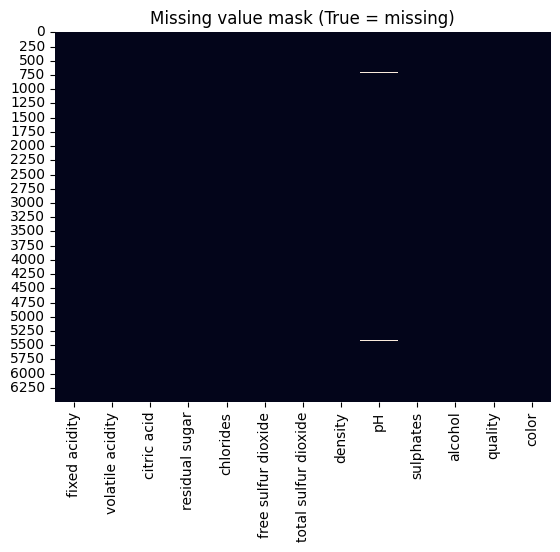

In [7]:
# simple missingness visualization
sns.heatmap(df_corrupt.isna(), cbar=False)
plt.title('Missing value mask (True = missing)');


### Histograms of features

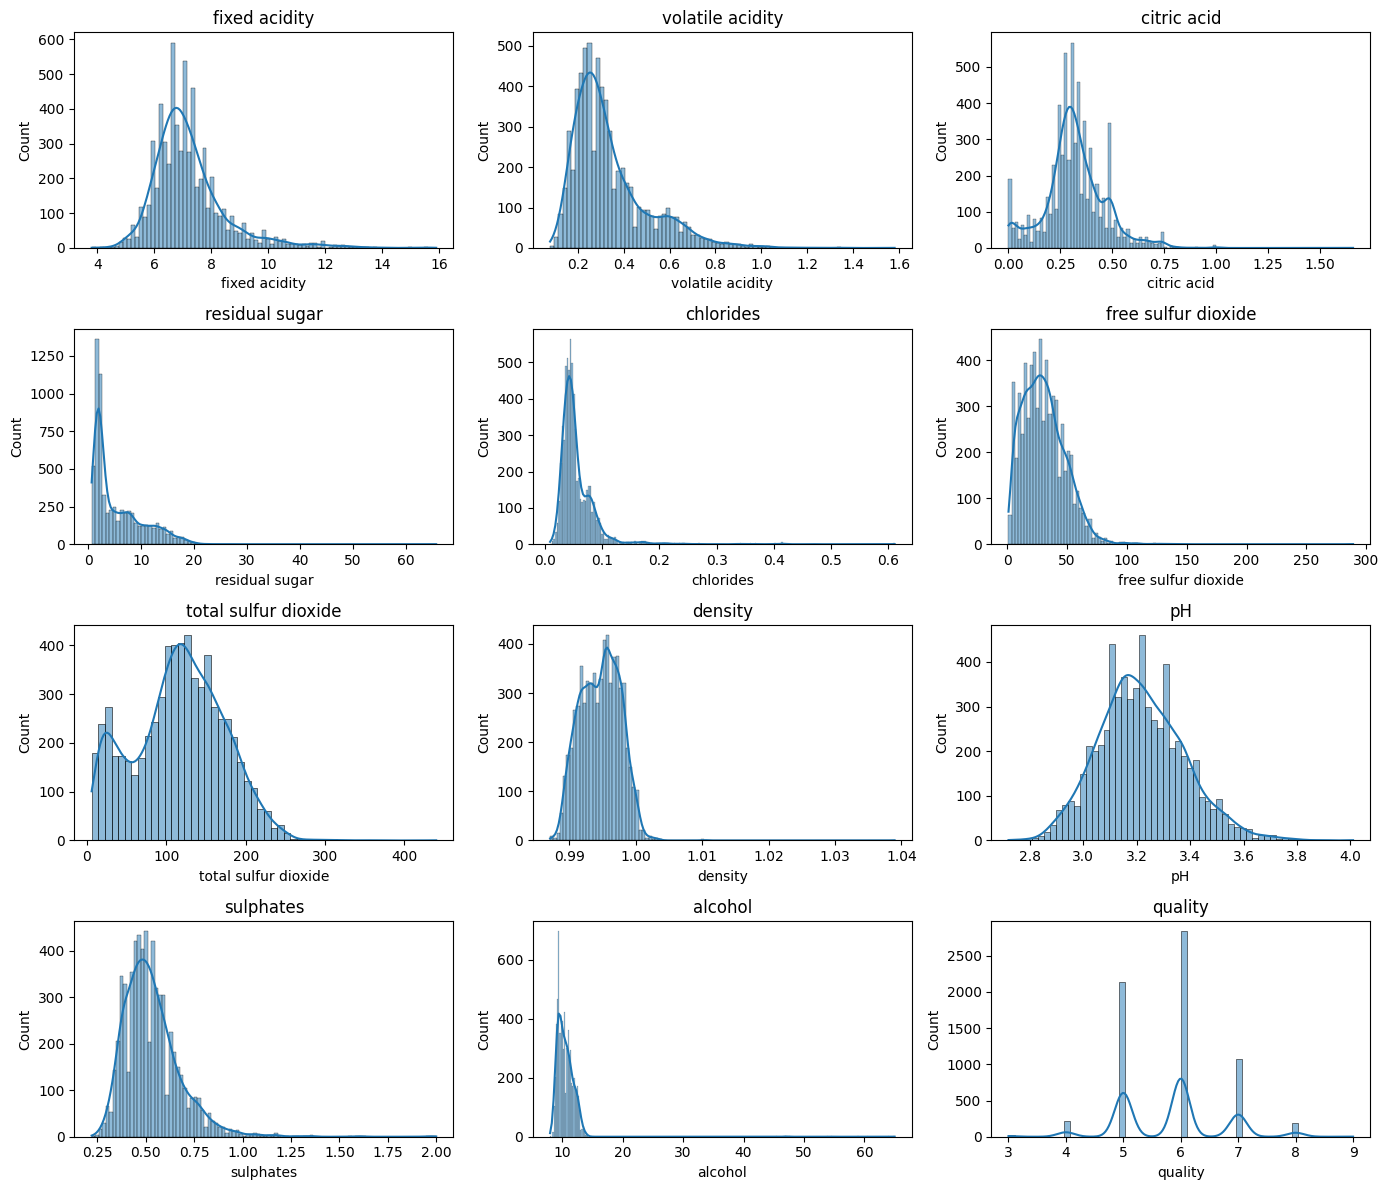

In [8]:
num_cols = df_corrupt.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(14, 3*len(num_cols)//3))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+2)//3, 3, i)
    sns.histplot(df_corrupt[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()


### Boxplots to visualize outliers

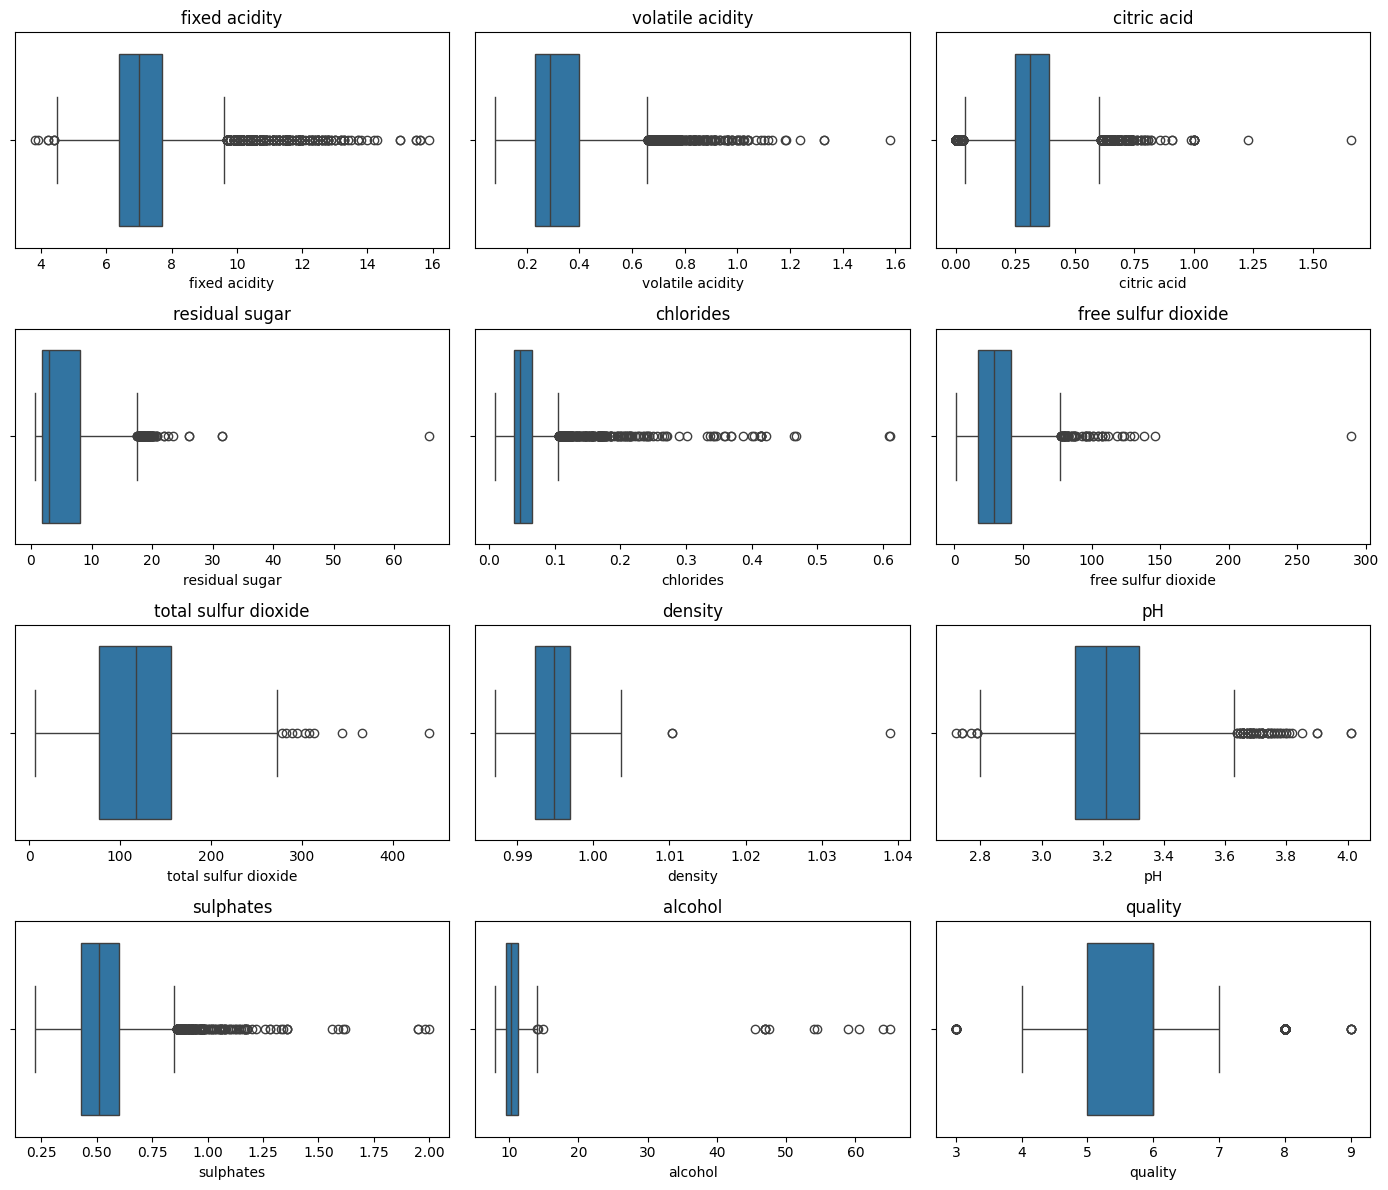

In [9]:
plt.figure(figsize=(14, 3*len(num_cols)//3))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+2)//3, 3, i)
    sns.boxplot(x=df_corrupt[col])
    plt.title(col)
plt.tight_layout()


### Target distribution: quality

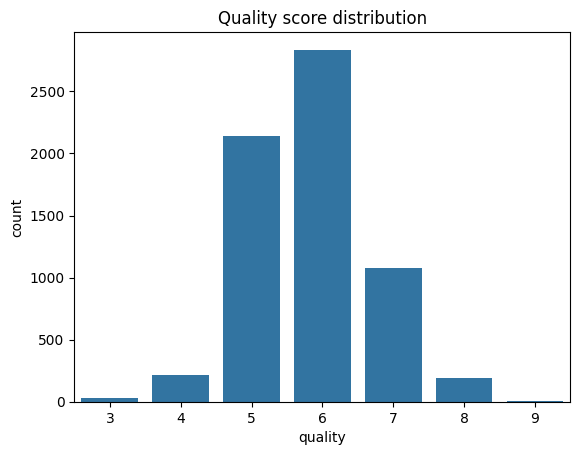

In [10]:
sns.countplot(x='quality', data=df_corrupt, order=sorted(df_corrupt['quality'].unique()))
plt.title('Quality score distribution');


### Compare red vs white

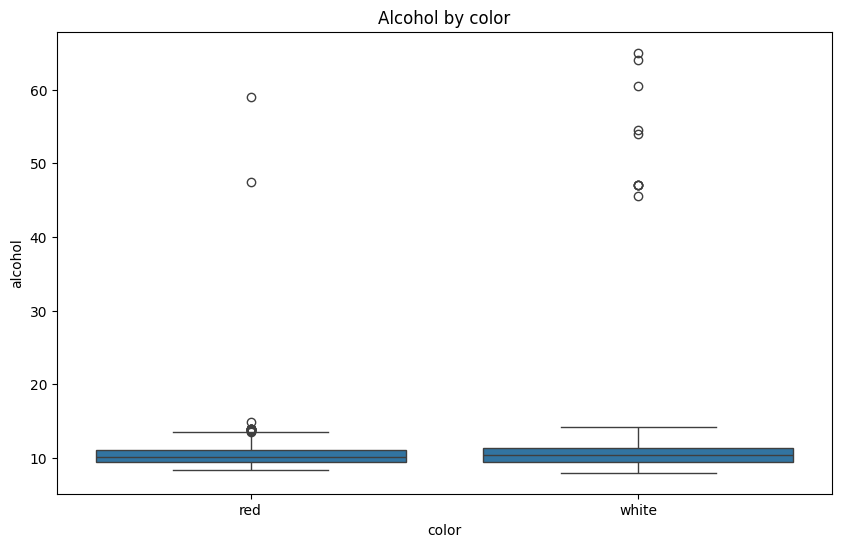

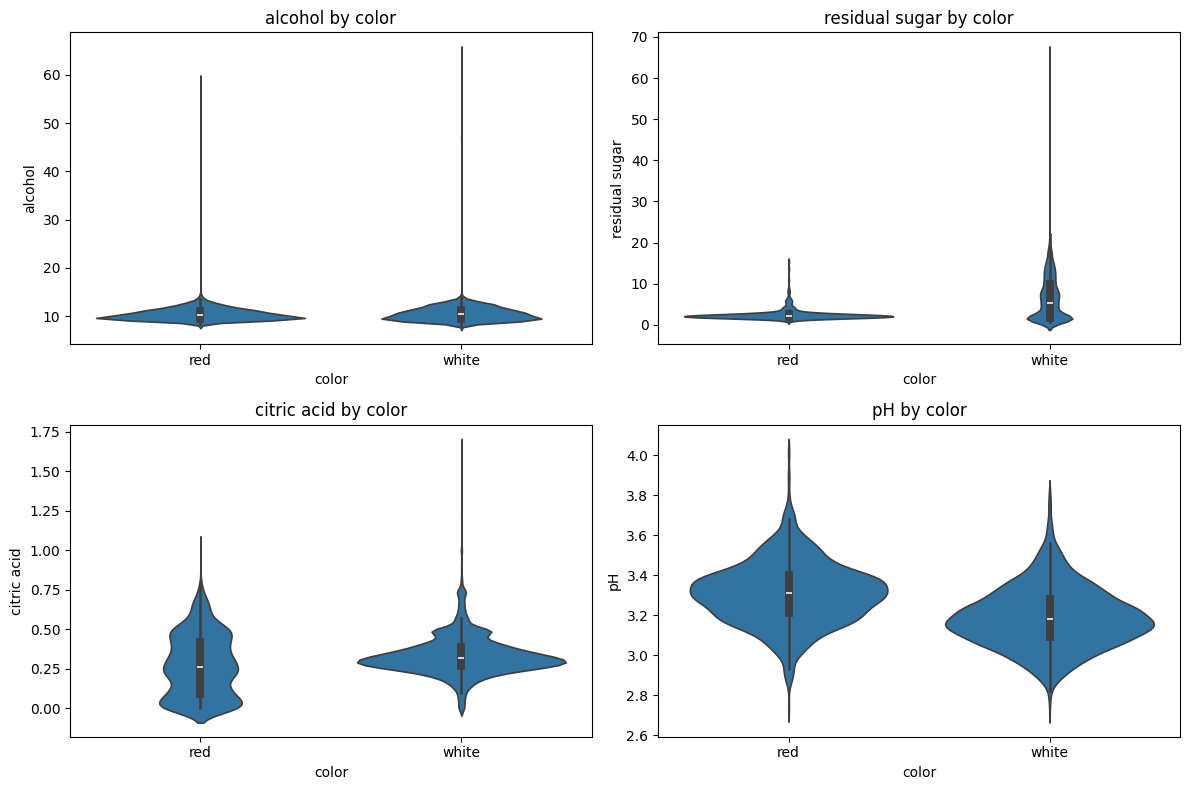

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='color', y='alcohol', data=df_corrupt)
plt.title('Alcohol by color')

# multiple features: use violin grid for a subset
subset = ['alcohol', 'residual sugar', 'citric acid', 'pH']
plt.figure(figsize=(12,8))
for i,col in enumerate(subset,1):
    plt.subplot(2,2,i)
    sns.violinplot(x='color', y=col, data=df_corrupt)
    plt.title(col + ' by color')
plt.tight_layout()

### Correlation matrix & heatmap + interpret

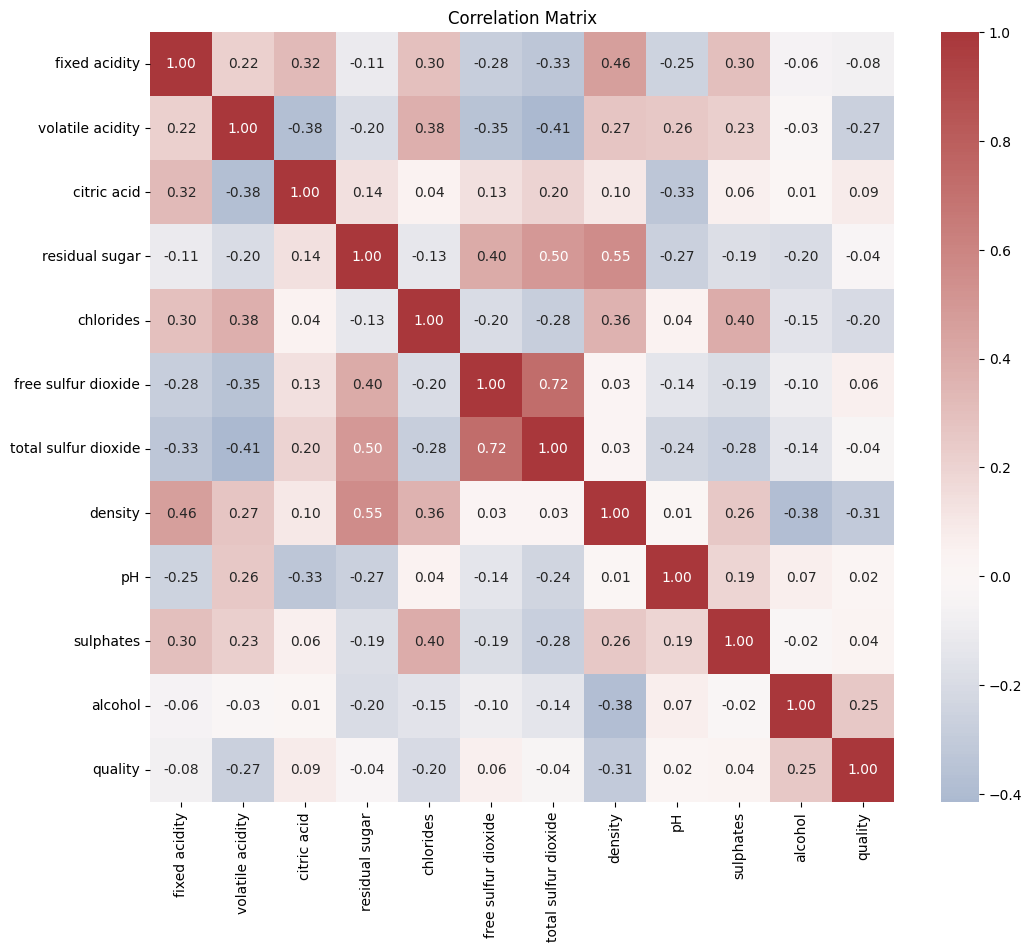

quality                 1.000000
alcohol                 0.248719
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.018767
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [13]:
corr = df_corrupt.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation Matrix')
plt.show()

# Correlation of each feature with the target variable
corr_with_target = corr['quality'].sort_values(ascending=False)
corr_with_target

### Compare Red vs White

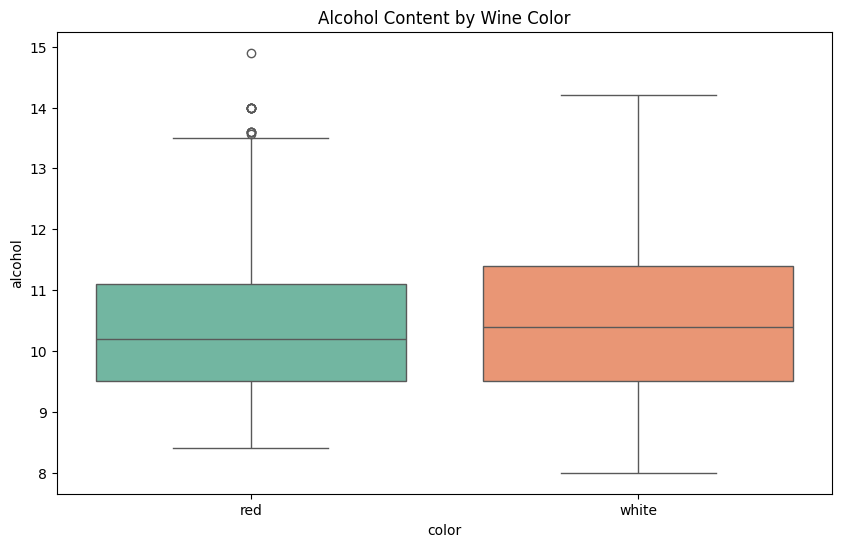

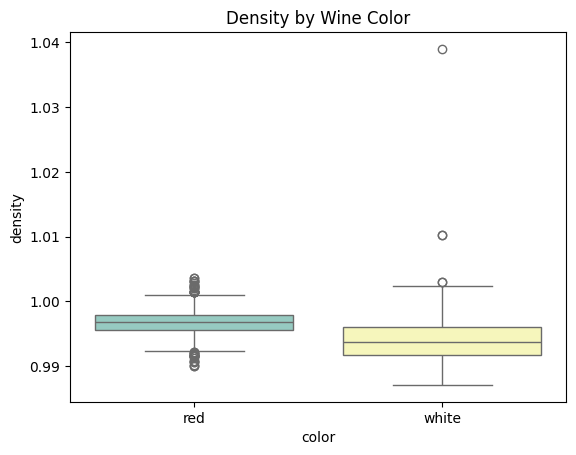

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='color', y='alcohol', hue='color', data=df, palette='Set2', legend=False)
plt.title('Alcohol Content by Wine Color')
plt.show()

sns.boxplot(x='color', y='density', hue='color', data=df, palette='Set3', legend=False)
plt.title('Density by Wine Color')
plt.show()